<a href="https://colab.research.google.com/github/satearnsvibe/MNIST-Digit-Recognition/blob/main/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing basic Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Importing DataSet

In [2]:
data = pd.read_csv('train.csv')

Shuffling Dataset

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [4]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [5]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([8, 1, 6, ..., 9, 1, 8])

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [11]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

In [9]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [12]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [13]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [14]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [15]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [16]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [17]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [18]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 1 1 ... 1 8 2] [8 1 6 ... 9 1 8]
0.11341463414634147
Iteration:  10
[6 1 1 ... 4 8 2] [8 1 6 ... 9 1 8]
0.1374878048780488
Iteration:  20
[7 1 4 ... 4 8 1] [8 1 6 ... 9 1 8]
0.17682926829268292
Iteration:  30
[2 1 4 ... 4 1 2] [8 1 6 ... 9 1 8]
0.22065853658536586
Iteration:  40
[2 1 3 ... 1 1 2] [8 1 6 ... 9 1 8]
0.2910731707317073
Iteration:  50
[2 1 2 ... 1 1 2] [8 1 6 ... 9 1 8]
0.36629268292682926
Iteration:  60
[2 1 6 ... 4 1 8] [8 1 6 ... 9 1 8]
0.42260975609756096
Iteration:  70
[2 1 6 ... 4 1 8] [8 1 6 ... 9 1 8]
0.4727073170731707
Iteration:  80
[2 1 6 ... 4 1 8] [8 1 6 ... 9 1 8]
0.5219024390243903
Iteration:  90
[2 1 6 ... 4 1 8] [8 1 6 ... 9 1 8]
0.5649268292682926
Iteration:  100
[2 1 6 ... 4 1 8] [8 1 6 ... 9 1 8]
0.6017317073170732
Iteration:  110
[2 1 6 ... 9 1 8] [8 1 6 ... 9 1 8]
0.6337804878048781
Iteration:  120
[2 1 6 ... 9 1 8] [8 1 6 ... 9 1 8]
0.6604878048780488
Iteration:  130
[2 1 6 ... 9 1 8] [8 1 6 ... 9 1 8]
0.6820487804878049
Iteration:  

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [21]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


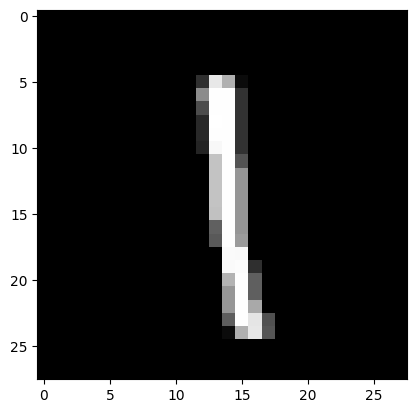

In [22]:
test_prediction(1, W1, b1, W2, b2)

Prediction:  [2]
Label:  2


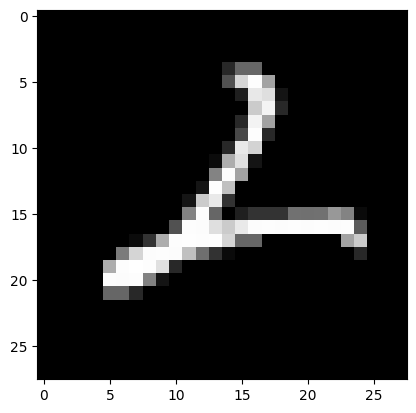

In [23]:
test_prediction(3, W1, b1, W2, b2)

Prediction:  [8]
Label:  8


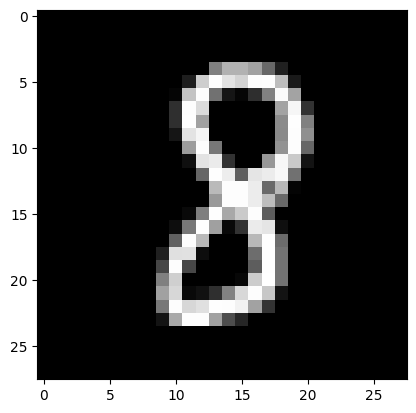

In [24]:
test_prediction(4, W1, b1, W2, b2)

Prediction:  [7]
Label:  5


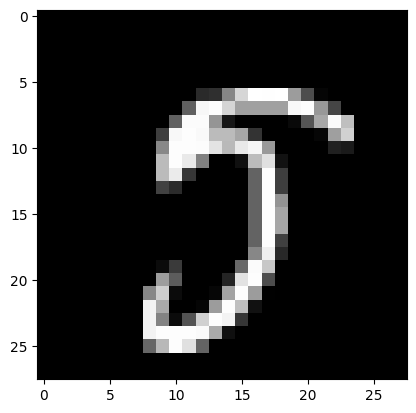

In [25]:
test_prediction(12, W1, b1, W2, b2) # mis-predicted

Prediction:  [2]
Label:  2


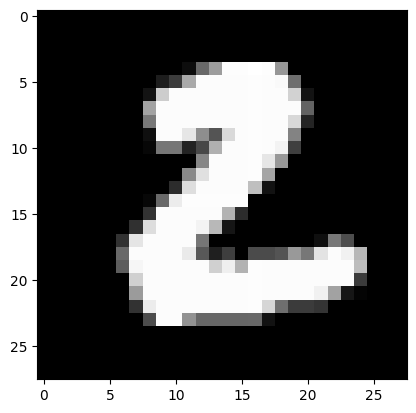

In [27]:
test_prediction(15, W1, b1, W2, b2)